In [1]:
import pandas as pd
from strategy import MomentumStrategy
from backtester import BacktestEngine

In [ ]:
initial_capital = 100_000
lookback = 12
top_n = 20
strategy = MomentumStrategy()
engine = BacktestEngine(
    strategy=strategy,
    start_date='2018-01-01',      # 6+ years of data
    cash=initial_capital,                  # $100k starting capital
    lookback=lookback,                   # 12-month momentum
    top_n=top_n,                      # Top 20 stocks (more diversification)
    skip_months=1                  # 1-month skip to avoid reversals
)

$BRK.B: possibly delisted; no timezone found

1 Failed download:
['BRK.B']: possibly delisted; no timezone found
$BF.B: possibly delisted; no price data found  (1d 2018-01-01 -> 2026-01-06)

1 Failed download:
['BF.B']: possibly delisted; no price data found  (1d 2018-01-01 -> 2026-01-06)
HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: WBA"}}}
$WBA: possibly delisted; no timezone found

1 Failed download:
['WBA']: possibly delisted; no timezone found
$HES: possibly delisted; no timezone found

1 Failed download:
['HES']: possibly delisted; no timezone found
$ANSS: possibly delisted; no timezone found

1 Failed download:
['ANSS']: possibly delisted; no timezone found
$JNPR: possibly delisted; no timezone found

1 Failed download:
['JNPR']: possibly delisted; no timezone found
$DFS: possibly delisted; no timezone found

1 Failed download:
['DFS']: possibly delisted; no timezone found
$CTLT: possibly delisted; no timezo


Data Summary:
  Total tickers after filtering: 464
  Date range: 2018-01-02 00:00:00 to 2026-01-06 00:00:00
  Monthly returns range: 2018-01-31 00:00:00 to 2026-01-31 00:00:00
  Total months: 97
Preprocessing: Removed 18 tickers with NaN prices



Final Portfolio Value: $264,951.52
Initial Capital: 100000

Metrics:
  total_return: 164.95%
  annualized_return: 23.69%
  sharpe_ratio: 92.88%
  volatility: 27.60%
  max_drawdown: -20.20%
  num_periods: 55
  Cash: $-0.00
Plot saved to outputs/backtest_results.png


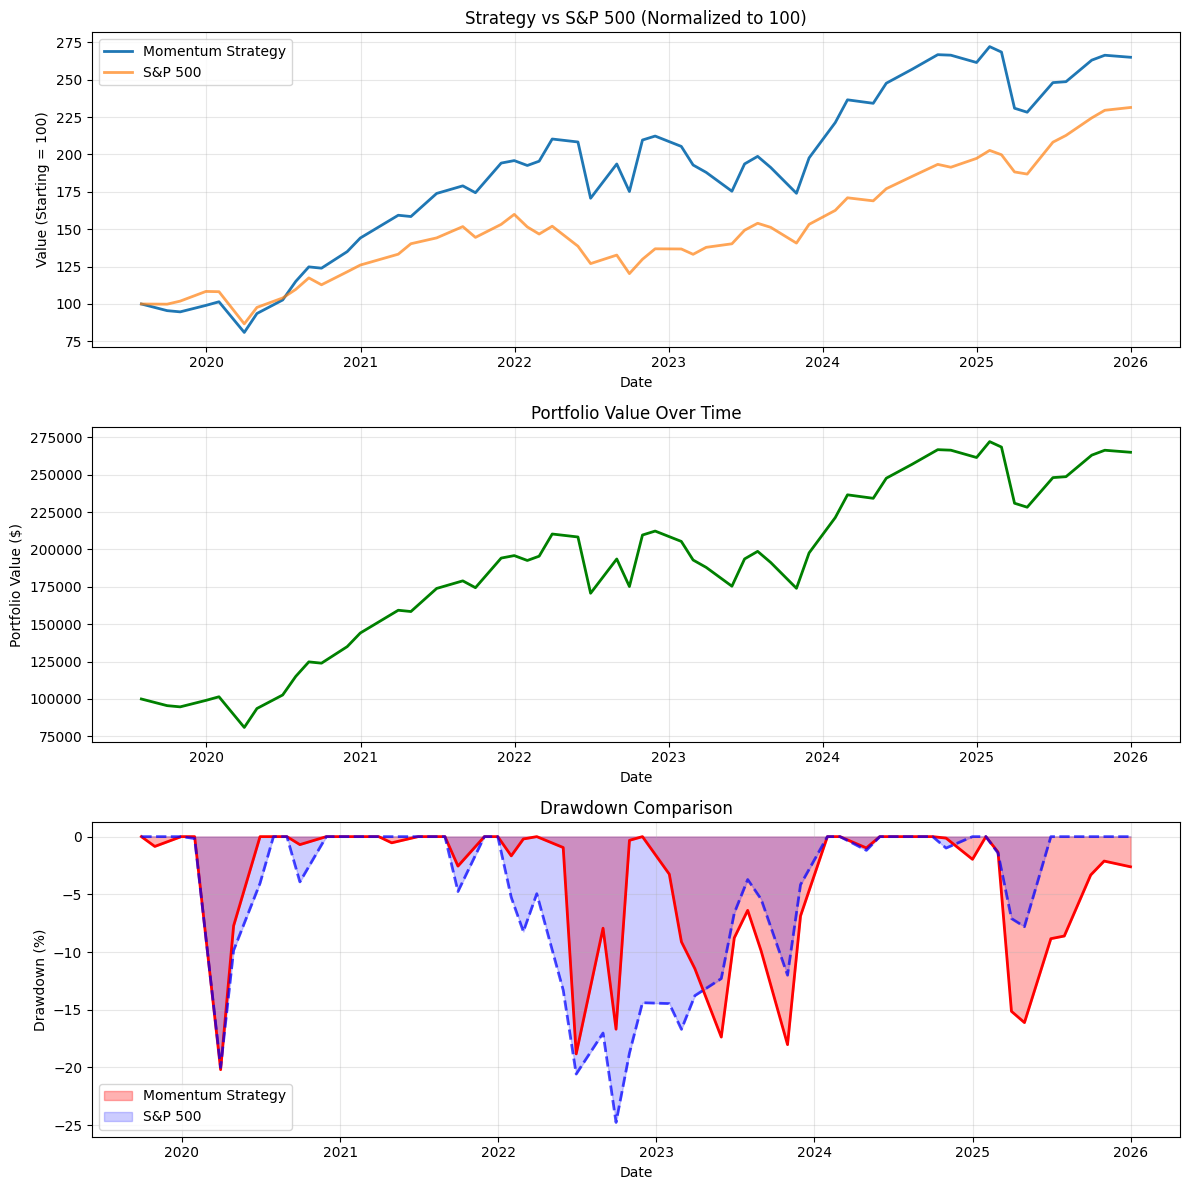

In [3]:
results = engine.backtest()
print(f"\nFinal Portfolio Value: ${results['history']['value'].iloc[-1]:,.2f}")
print(f"Initial Capital: {initial_capital}")
print("\nMetrics:")
for key, value in results['metrics'].items():
    if key == 'num_periods':
        print(f"  {key}: {value}")
    elif pd.isna(value) or value is None:
        print(f"  {key}: N/A")
    else:
        print(f"  {key}: {value:.2%}")

print(f"  Cash: ${results['portfolio']['cash']:,.2f}")
history = results['history']
engine.plot_results(portfolio_history=history)